In [1]:
# Basic settings for pyspark.
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Iteration4_misl938').getOrCreate()

In [2]:
# Import the relevant Python libraries.

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import pyspark.sql.functions as F


In [3]:
# I have installed pip on python to import seaborn

# sudo apt-get install -y python3-dev python3-setuptools
#sudo apt-get update
#sudo apt-get install python3-pip
#pip3 install -U pip
#pip install seaborn --user

import seaborn as sns

In [4]:
# Let's read in the data.
#housing_data = spark.read.csv('Datasets/Melbourne_housing.csv', inferSchema= True, header = True)
housing_data = spark.read.csv('Datasets/Melbourne_housing.csv', header = True,inferSchema=True)

In [8]:
# The show method allows us to visualise DataFrames.
housing_data.show(10)


+----------+------------------+-----+----+-------+------+-------+---------+--------+--------+--------+--------+---+--------+------------+---------+------------------+---------+----------+--------------------+-------------+
|    Suburb|           Address|Rooms|Type|  Price|Method|SellerG|     Date|Distance|Postcode|Bedroom2|Bathroom|Car|Landsize|BuildingArea|YearBuilt|       CouncilArea|Lattitude|Longtitude|          Regionname|Propertycount|
+----------+------------------+-----+----+-------+------+-------+---------+--------+--------+--------+--------+---+--------+------------+---------+------------------+---------+----------+--------------------+-------------+
|Abbotsford|     68 Studley St|    2|   h|   null|    SS| Jellis|3/09/2016|     2.5|    3067|       2|       1|  1|     126|        null|     null|Yarra City Council| -37.8014|  144.9958|Northern Metropol...|         4019|
|Abbotsford|      85 Turner St|    2|   h|1480000|     S| Biggin|3/12/2016|     2.5|    3067|       2|      

In [169]:
# Let's have a better view of the 20 rows of dataset
housing_data.limit(10).toPandas()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067,...,1,1,126,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067,...,1,1,202,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067,...,1,0,156,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067,...,2,1,0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067,...,2,0,134,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067,...,2,1,94,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067,...,1,2,120,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067,...,2,2,400,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,6/08/2016,2.5,3067,...,1,2,201,NaN,1900.0,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,6/08/2016,2.5,3067,...,2,1,202,NaN,1900.0,Yarra City Council,-37.7996,144.9989,Northern Metropolitan,4019


In [189]:
# Let's have a look at the column names. 
columns = housing_data.columns
columns


['Suburb',
 'Address',
 'Rooms',
 'Type',
 'Price',
 'Method',
 'SellerG',
 'Date',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'CouncilArea',
 'Lattitude',
 'Longtitude',
 'Regionname',
 'Propertycount']

In [67]:
# number of rows/entry in the dataset
housing_data.count()

34857

In [6]:
# Percentage of null values

for item in housing_data.columns:
    percentage=housing_data.where(F.col(item).isNull()).count()/housing_data.count()*100
    print("Percentage of null values for " + item + " = %g" % percentage)


Percentage of null values for Suburb = 0
Percentage of null values for Address = 0
Percentage of null values for Rooms = 0
Percentage of null values for Type = 0
Percentage of null values for Price = 21.8321
Percentage of null values for Method = 0
Percentage of null values for SellerG = 0
Percentage of null values for Date = 0
Percentage of null values for Distance = 0.00286886
Percentage of null values for Postcode = 0.00286886
Percentage of null values for Bedroom2 = 23.5735
Percentage of null values for Bathroom = 23.5993
Percentage of null values for Car = 25.0394
Percentage of null values for Landsize = 33.8813
Percentage of null values for BuildingArea = 60.5761
Percentage of null values for YearBuilt = 55.3863
Percentage of null values for CouncilArea = 0.00860659
Percentage of null values for Lattitude = 22.8821
Percentage of null values for Longtitude = 22.8821
Percentage of null values for Regionname = 0.00860659
Percentage of null values for Propertycount = 0.00860659


In [165]:
# We can use the describe method to get some general statistics on our data. 
housing_data.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Suburb,34857,None,None,Abbotsford,viewbank
Address,34857,None,None,1 Abercrombie St,9b Stewart St
Rooms,34857,3.0310124221820582,0.9699329348975181,1,16
Type,34857,None,None,h,u
Price,27247,1050173.344955408,641467.1301046003,85000,11200000
Method,34857,None,None,PI,W
SellerG,34857,None,None,@Realty,voglwalpole
Date,34857,None,None,1/07/2017,9/12/2017
Distance,34856,11.184929423916575,6.788892455935919,0.0,48.1


In [145]:
# entries with 0 building area
housing_data.filter(housing_data.BuildingArea=='0').count()

76

In [35]:
# number houses was built before 1835
housing_data.filter(housing_data.YearBuilt < '1835' ).count()

4

In [42]:
#houses was built before 1835
housing_data.filter(housing_data.YearBuilt < '1835' ).toPandas()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Collingwood,2/79 Oxford St,2,u,855000,S,Nelson,3/09/2016,1.6,3066,...,1,1,2886,122,1830,Yarra City Council,-37.8042,144.9845,Northern Metropolitan,4553
1,South Melbourne,403 Park St,3,h,None,SP,Cayzer,20/05/2017,2.1,3205,...,2,0,104,125,1800,Port Phillip City Council,-37.838,144.9525,Southern Metropolitan,5943
2,Mount Waverley,5 Armstrong St,3,h,1200000,VB,McGrath,24/06/2017,14.2,3149,...,1,4,807,117,1196,Monash City Council,-37.86788,145.12121,Eastern Metropolitan,13366
3,Carlton North,146 Pigdon St,2,u,720000,S,Jellis,28/10/2017,3.5,3054,...,1,None,None,64,1820,Melbourne City Council,-37.78188,144.97227,Northern Metropolitan,3106


In [170]:
# number houses was built after 2018
housing_data.filter(housing_data.YearBuilt > '2018' ).count()

2

In [171]:
# houses was built after 2018
housing_data.filter(housing_data.YearBuilt > '2018' ).toPandas()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Bulleen,3 Maringa St,4,h,NaN,SP,Ray,7/11/2016,11.8,3105,...,2,2,729,255.0,2106,Manningham City Council,-37.76370,145.08810,Eastern Metropolitan,4480
1,Bentleigh,1 Wyuna Ct,3,h,1100000.0,VB,Woodards,17/03/2018,11.4,3204,...,1,4,635,242.0,2019,Glen Eira City Council,-37.92963,145.03666,Southern Metropolitan,6795


In [8]:
# For type, we can use print schema. 
housing_data.printSchema()


root
 |-- Suburb: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Rooms: integer (nullable = true)
 |-- Type: string (nullable = true)
 |-- Price: integer (nullable = true)
 |-- Method: string (nullable = true)
 |-- SellerG: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Distance: double (nullable = true)
 |-- Postcode: integer (nullable = true)
 |-- Bedroom2: integer (nullable = true)
 |-- Bathroom: integer (nullable = true)
 |-- Car: integer (nullable = true)
 |-- Landsize: integer (nullable = true)
 |-- BuildingArea: double (nullable = true)
 |-- YearBuilt: integer (nullable = true)
 |-- CouncilArea: string (nullable = true)
 |-- Lattitude: double (nullable = true)
 |-- Longtitude: double (nullable = true)
 |-- Regionname: string (nullable = true)
 |-- Propertycount: integer (nullable = true)



In [5]:
# Let's import in the relevant types.
from pyspark.sql.types import (StructField,StringType,IntegerType,DateType,ShortType,DoubleType,StructType)

In [6]:
# Then create a variable with the correct structure.

data_schema = [StructField('Suburb',StringType(),True),
               StructField('Address',StringType(),True),
               StructField('Rooms',IntegerType(),True),
               StructField('Type',StringType(),True),
               StructField('Price',IntegerType(),True),
               StructField('Method',StringType(),True),
               StructField('SellerG',StringType(),True),
               StructField('Date',DateType(),True),
               StructField('Distance',DoubleType(),True),
               StructField('Postcode',IntegerType(),True),
               StructField('Bedroom2',IntegerType(),True),            
               StructField('Bathroom',IntegerType(),True),
               StructField('Car',IntegerType(),True),
               StructField('Landsize',IntegerType(),True),
               StructField('BuildingArea',DoubleType(),True),
               StructField('YearBuilt',IntegerType(),True),
               StructField('CouncilArea',StringType(),True),
               StructField('Lattitude',DoubleType(),True),
               StructField('Longtitude',DoubleType(),True),      
               StructField('Regionname',StringType(),True),
               StructField('Propertycount',IntegerType(),True)]

final_struct = StructType(fields=data_schema)


In [7]:
# And now we can read in the data using that schema. If we print the schema, we can see that age is now an integer. 

housing_data = spark.read.csv('Datasets/Melbourne_housing.csv', schema=final_struct, header = True)

housing_data.printSchema()


root
 |-- Suburb: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Rooms: integer (nullable = true)
 |-- Type: string (nullable = true)
 |-- Price: integer (nullable = true)
 |-- Method: string (nullable = true)
 |-- SellerG: string (nullable = true)
 |-- Date: date (nullable = true)
 |-- Distance: double (nullable = true)
 |-- Postcode: integer (nullable = true)
 |-- Bedroom2: integer (nullable = true)
 |-- Bathroom: integer (nullable = true)
 |-- Car: integer (nullable = true)
 |-- Landsize: integer (nullable = true)
 |-- BuildingArea: double (nullable = true)
 |-- YearBuilt: integer (nullable = true)
 |-- CouncilArea: string (nullable = true)
 |-- Lattitude: double (nullable = true)
 |-- Longtitude: double (nullable = true)
 |-- Regionname: string (nullable = true)
 |-- Propertycount: integer (nullable = true)



In [47]:
from pylab import rcParams

sns.set(style="ticks", color_codes =True)
sns.set_style("whitegrid")
rcParams['figure.dpi'] = 80
rcParams['lines.linewidth'] = 1
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'
rcParams['figure.figsize'] = 10,8
rcParams['font.size'] = 20
rcParams['axes.labelsize'] = 'small'
rcParams['xtick.labelsize'] = 20
rcParams['ytick.labelsize'] = 20

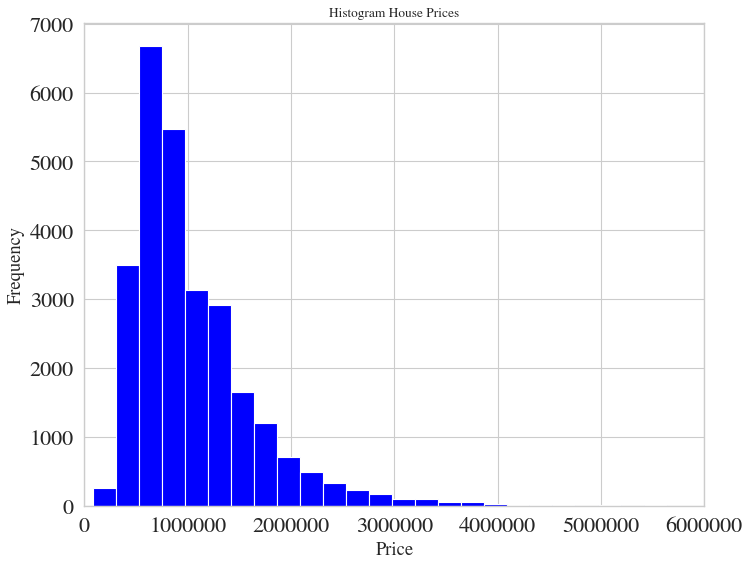

In [28]:

# Make a histogram of all the ratings in the Price column.
#print ("Skew is:", PriceArr.skew())
PriceArr = np.array(housing_data.na.drop(subset ='Price').select('Price').collect())
plt.hist(PriceArr,  bins = 50, color = 'Blue')
plt.ylabel ('Frequency')
plt.xlabel ('Price')
plt.xlim([0, 6000000])
plt.title ('Histogram House Prices')
plt.show()


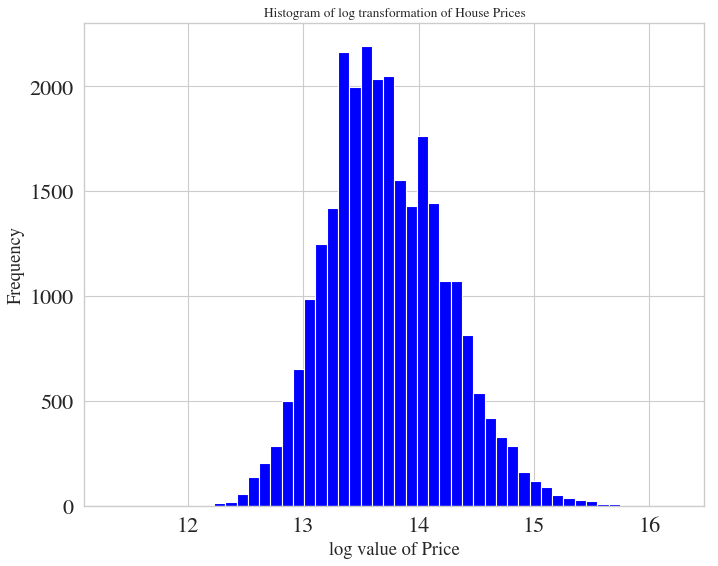

In [57]:

# Make a histogram of all the ratings in the Price column.
#print ("Skew is:", PriceArr.skew())

#housing_data = housing_data.withColumn('logPrice', F.log(housing_data.Price))

PriceArr = np.array(housing_data.na.drop(subset ='Price').select('Price').collect())
logPriceArr =np.log(PriceArr)
plt.hist(logPriceArr,  bins = 50, color = 'Blue')
plt.ylabel ('Frequency')
plt.xlabel ('log value of Price')
plt.title ('Histogram of log transformation of House Prices')
plt.show()


In [41]:
# to view the selected column(s)
housing_data.select('Rooms','Bedroom2','YearBuilt','Car','Type','BuildingArea','Distance','Landsize','Bathroom','Price').limit(20).toPandas()

,Rooms,Bedroom2,YearBuilt,Car,Type,BuildingArea,Distance,Landsize,Bathroom,Price
0,2,2,None,1,h,None,2.5,126,1,None
1,2,2,None,1,h,None,2.5,202,1,1480000
2,2,2,1900,0,h,79,2.5,156,1,1035000
3,3,3,None,1,u,None,2.5,0,2,None
4,3,3,1900,0,h,150,2.5,134,2,1465000
5,3,3,None,1,h,None,2.5,94,2,850000
6,4,3,2014,2,h,142,2.5,120,1,1600000
7,4,3,2006,2,h,220,2.5,400,2,None
8,2,4,1900,2,h,None,2.5,201,1,None
9,2,3,1900,1,h,None,2.5,202,2,None


In [50]:
# to view statistical information of the selected column(s)
housing_data.describe('Rooms','YearBuilt','BuildingArea','Distance','Landsize','Price').toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Rooms,34857,3.0310124221820582,0.9699329348975181,1,16
YearBuilt,15551,1965.289884894862,37.328178023136594,1196,2106
BuildingArea,13742,160.2564003565711,401.26706008485513,0.0,44515.0
Distance,34856,11.184929423916575,6.788892455935919,0.0,48.1
Landsize,23047,593.598993361392,3398.8419464599056,0,433014
Price,27247,1050173.344955408,641467.1301046003,85000,11200000


In [4]:
housing_data.head()

Row(Suburb='Abbotsford', Address='68 Studley St', Rooms='2', Type='h', Price=None, Method='SS', SellerG='Jellis', Date='3/09/2016', Distance='2.5', Postcode='3067', Bedroom2='2', Bathroom='1', Car='1', Landsize='126', BuildingArea=None, YearBuilt=None, CouncilArea='Yarra City Council', Lattitude='-37.8014', Longtitude='144.9958', Regionname='Northern Metropolitan', Propertycount='4019')

In [6]:
# A simple for loop allows us to make it even clearer. 
for item in housing_data.head():
    print(item)

Abbotsford
68 Studley St
2
h
None
SS
Jellis
3/09/2016
2.5
3067
2
1
1
126
None
None
Yarra City Council
-37.8014
144.9958
Northern Metropolitan
4019


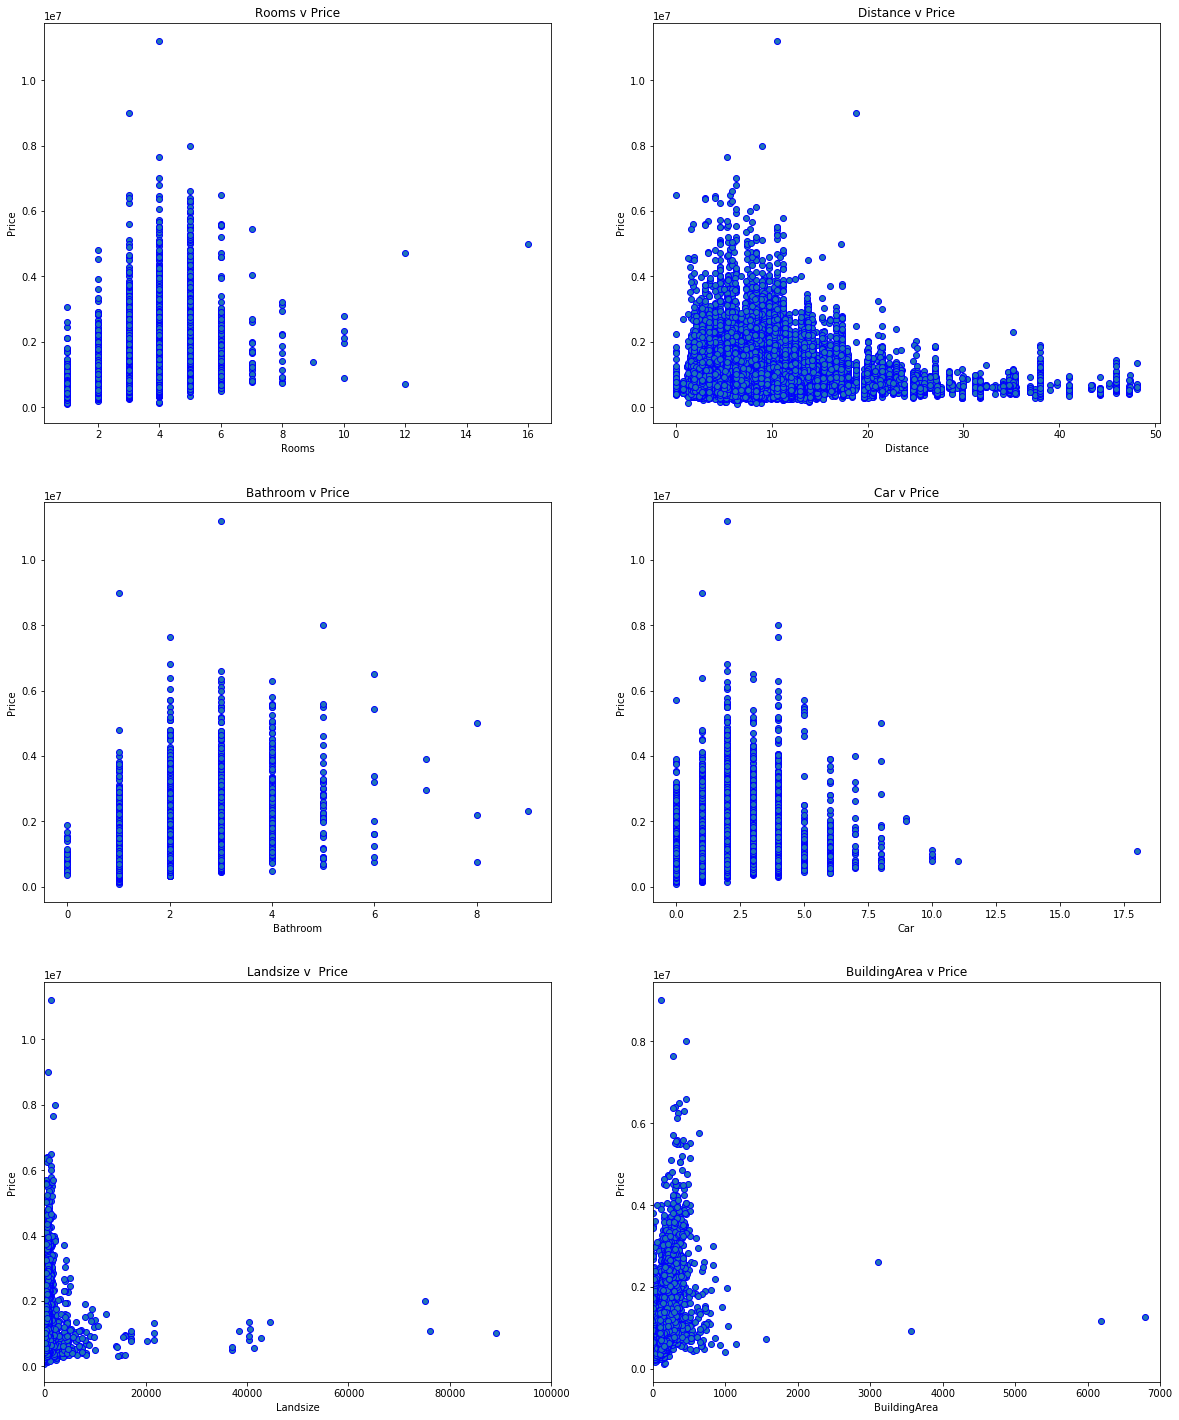

In [37]:
# numeric features vs price

f, axes = plt.subplots(3,2, figsize = (20,25))

PriceArr = np.array(housing_data.select('Price').collect())
RoomsArr = np.array(housing_data.select('Rooms').collect())
DistanceArr = np.array(housing_data.select('Distance').collect())
BathroomArr = np.array(housing_data.select('Bathroom').collect())
CarArr = np.array(housing_data.select('Car').collect())
LandsizeArr = np.array(housing_data.select('Landsize').collect())
BuildingAreaArr = np.array(housing_data.select('BuildingArea').collect())

# Plot [0,0]
axes[0,0].scatter(RoomsArr,PriceArr, edgecolor = 'b')
axes[0,0].set_xlabel('Rooms')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Rooms v Price')

# Plot [0,1]
axes[0,1].scatter(DistanceArr, PriceArr,  edgecolor = 'b')
axes[0,1].set_xlabel('Distance')
axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Distance v Price')

# Plot [1,0]
axes[1,0].scatter(BathroomArr,PriceArr,  edgecolor = 'b')
axes[1,0].set_xlabel('Bathroom')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Bathroom v Price')

# Plot [1,1]
axes[1,1].scatter(CarArr, PriceArr,  edgecolor = 'b')
axes[1,1].set_xlabel('Car')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Car v Price')

# Plot [2,0]
axes[2,0].scatter(LandsizeArr, PriceArr,  edgecolor = 'b')
axes[2,0].set_xlabel('Landsize')
axes[2,0].set_ylabel('Price')
axes[2,0].set_xlim([0, 100000])
axes[2,0].set_title('Landsize v  Price')

# Plot [2,1]
axes[2,1].scatter(BuildingAreaArr, PriceArr, edgecolor = 'b')
axes[2,1].set_xlabel('BuildingArea')
axes[2,1].set_ylabel('Price')
axes[2,1].set_xlim([0, 7000])
axes[2,1].set_title('BuildingArea v Price')



plt.show()

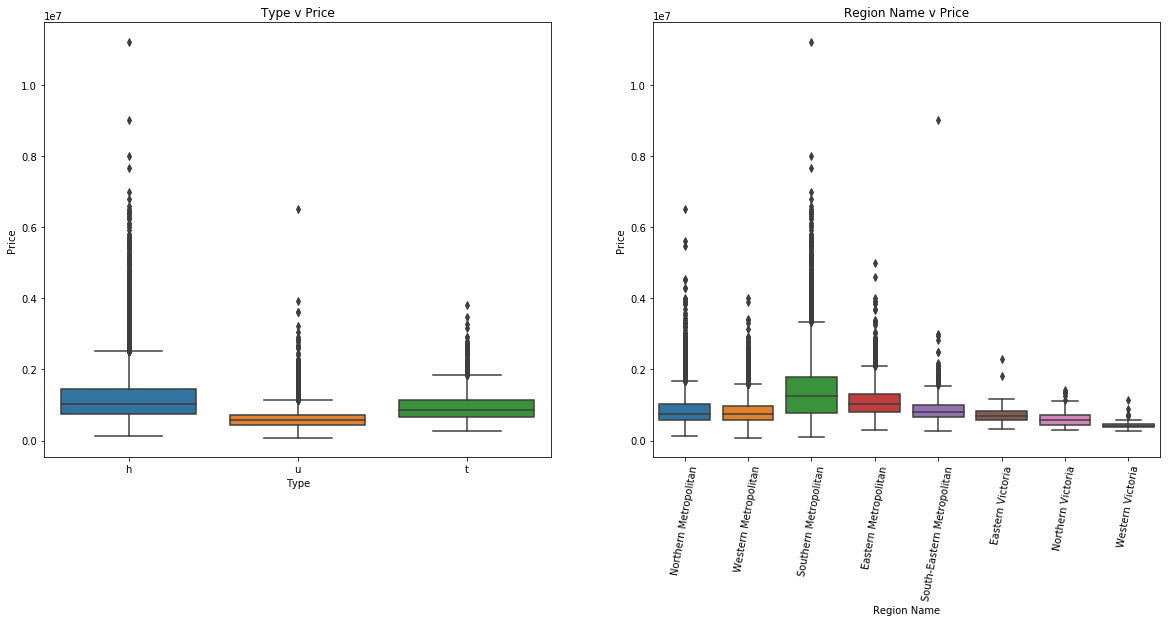

In [22]:
# categorical features v price


#used toPandas() without sample as the dataset is small. For big data I can use
#data_plot= housing_data.select('Price','Type','Regionname')..sample(False,0.1).toPandas()
data_plot= housing_data.select('Price','Type','Regionname').toPandas()



f, axes = plt.subplots(1,2, figsize = (20,8))
labels=(data_plot['Regionname'].unique()).tolist()



# Plot [0]
sns.boxplot( x = 'Type', y = 'Price',data = data_plot, ax = axes[0])
axes[0].set_xlabel('Type')
axes[0].set_ylabel('Price')
axes[0].set_title('Type v Price')

# Plot [1]
sns.boxplot(x = 'Regionname', y = 'Price', data = data_plot, ax = axes[1])
axes[1].set_xticklabels(labels, rotation=80)
axes[1].set_xlabel('Region Name')
axes[1].set_ylabel('Price')
axes[1].set_title('Region Name v Price')


plt.show()

In [8]:
# Select a list of relevant columns. 
# Name, for example, is somewhat irrelevant.
my_cols = housing_data.select([
 'Rooms',
'Suburb',
 'Type',
 'Price',
 'Method',
 'Distance',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'CouncilArea',
 'Lattitude',
 'Longtitude',
 'Regionname',
 'Propertycount'])

In [9]:
# Dropping all the rows with null values
final_housing_data = my_cols.na.drop()

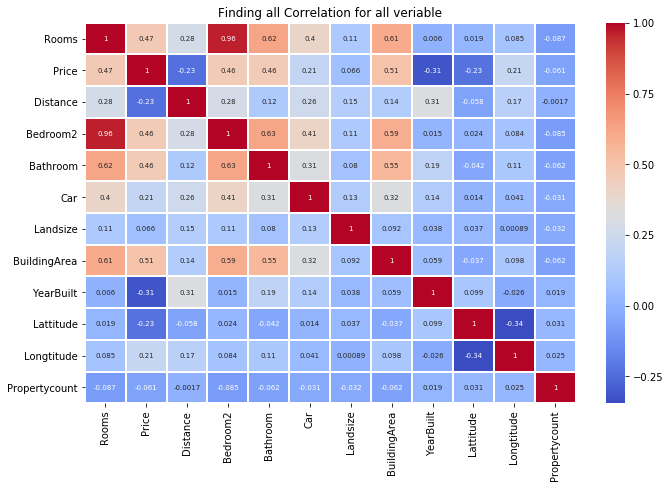

In [20]:
# checking correlation for all variables
plt.figure(figsize=(11,7))
sns.heatmap(final_housing_data.sample(False, 0.95).toPandas().corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 7})
plt.title('Finding all Correlation for all veriable')

print ("\n")

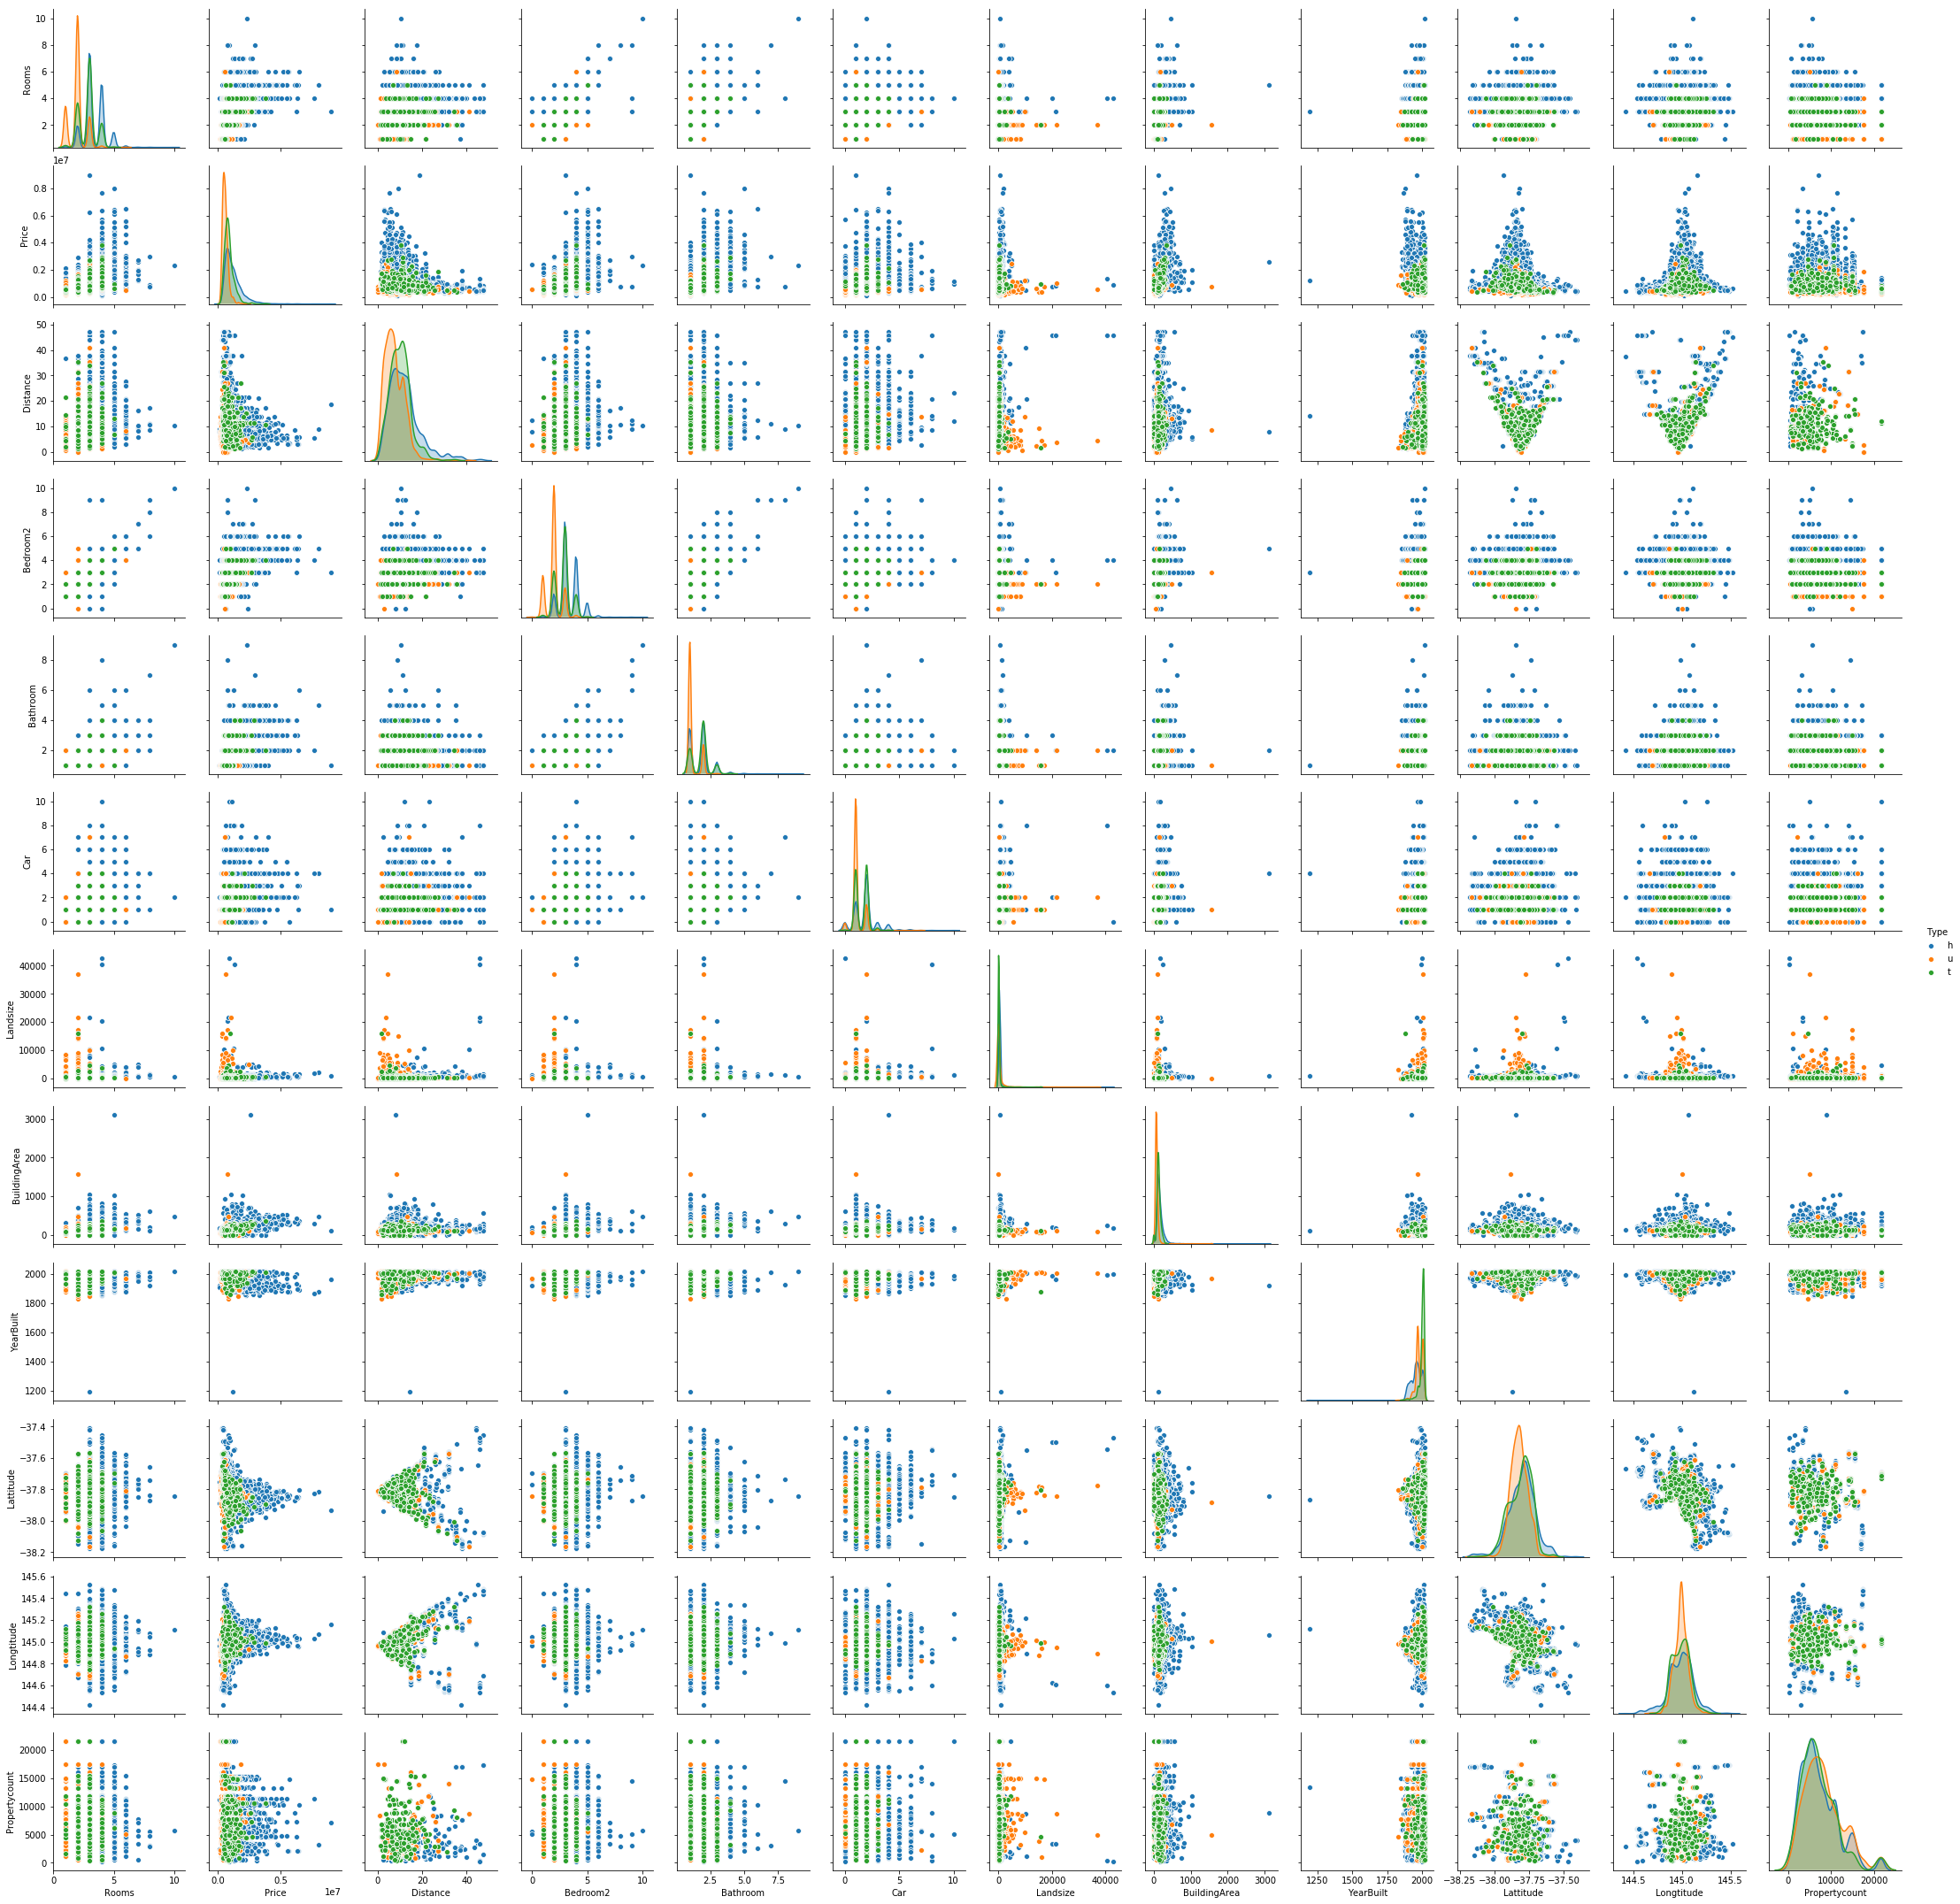

In [11]:
#pairplot of the variable according to Types
sns.pairplot(final_housing_data.sample(False, 0.95).toPandas(), hue= 'Type')


In [21]:
# Import VectorAssembler and Vectors
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,
                                OneHotEncoder,StringIndexer)

In [22]:
# First create a string indexer (convert every string into a number, such as male = 0 and female = 1).
# A number will be assigned to every category in the column.
type_indexer = StringIndexer(inputCol='Type',outputCol='TypeIndex').fit(final_housing_data)
final_housing_data= type_indexer.transform(final_housing_data)

# Now we can one hot encode these numbers. This converts the various outputs into a single vector.
# This makes it easier to process when you have multiple classes.
final_housing_data = OneHotEncoder(inputCol='TypeIndex',outputCol='TypeVec').transform(final_housing_data)

In [23]:
# First create a string indexer (convert every string into a number, such as male = 0 and female = 1).
# A number will be assigned to every category in the column.
region_indexer = StringIndexer(inputCol='Regionname',outputCol='RegionnameIndex').fit(final_housing_data)
final_housing_data= region_indexer.transform(final_housing_data)

# Now we can one hot encode these numbers. This converts the various outputs into a single vector.
# This makes it easier to process when you have multiple classes.
final_housing_data = OneHotEncoder(inputCol='RegionnameIndex',outputCol='RegionnameVec').transform(final_housing_data)

In [24]:
# First create a string indexer (convert every string into a number, such as male = 0 and female = 1).
# A number will be assigned to every category in the column.
method_indexer = StringIndexer(inputCol='Method',outputCol='MethodIndex').fit(final_housing_data)
final_housing_data= method_indexer.transform(final_housing_data)

# Now we can one hot encode these numbers. This converts the various outputs into a single vector.
# This makes it easier to process when you have multiple classes.
final_housing_data = OneHotEncoder(inputCol='MethodIndex',outputCol='MethodVec').transform(final_housing_data)

In [25]:
# First create a string indexer (convert every string into a number, such as male = 0 and female = 1).
# A number will be assigned to every category in the column.
council_indexer = StringIndexer(inputCol='CouncilArea',outputCol='CouncilAreaIndex').fit(final_housing_data)
final_housing_data= council_indexer.transform(final_housing_data)

# Now we can one hot encode these numbers. This converts the various outputs into a single vector.
# This makes it easier to process when you have multiple classes.
final_housing_data = OneHotEncoder(inputCol='CouncilAreaIndex',outputCol='CouncilAreaVec').transform(final_housing_data)

In [16]:
#https://databricks-prod-cloudfront.cloud.databricks.com/public/4027ec902e239c93eaaa8714f173bcfc/1779476228152266/1437143569842658/5673666086694627/latest.html

#https://blog.epigno.systems/2018/02/18/machine-learning-with-pyspark-linear-regression/
#https://towardsdatascience.com/building-a-linear-regression-with-pyspark-and-mllib-d065c3ba246a
#https://opensource.com/article/19/5/log-data-apache-spark


In [26]:
final_housing_data= final_housing_data.withColumn('logPrice', F.log('Price'))

final_housing_data.columns

['Rooms',
 'Suburb',
 'Type',
 'Price',
 'Method',
 'Distance',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'CouncilArea',
 'Lattitude',
 'Longtitude',
 'Regionname',
 'Propertycount',
 'TypeIndex',
 'TypeVec',
 'RegionnameIndex',
 'RegionnameVec',
 'MethodIndex',
 'MethodVec',
 'CouncilAreaIndex',
 'CouncilAreaVec',
 'logPrice']

In [30]:
# The input columns are the feature column names, and the output column is what you'd like the new column to be named. 
assembler = VectorAssembler(
    inputCols=[
     'Rooms',
     'TypeVec',
     'MethodVec',
     'Distance',
     'Bedroom2',
     'Bathroom',
     'Car',
     'Landsize',
     'BuildingArea',
     'YearBuilt',
     'CouncilAreaVec',
     'Lattitude',
     'Longtitude',
     'RegionnameVec',
     'Propertycount'],
    outputCol="features")

In [27]:
#randomly split data into training and test dataset
(train_data, test_data) = final_housing_data.randomSplit([0.7, 0.3], seed = 111)

In [108]:
#Linear Regression Starts from here


#lr_housing_data = assembler.transform(final_housing_data)

lr_train_data = assembler.transform(train_data)
lr_test_data = assembler.transform(test_data)



In [95]:
# Let's do a randomised 70/30 split. 
# Remember, you can use other splits depending on how easy/difficult it is to train your model.
#lr_train_data,lr_test_data = lr_housing_data.randomSplit([0.7,0.3])

In [109]:
# importing LinearRegression
from pyspark.ml.regression import LinearRegression

In [110]:
# These are the default values:
# featuresCol: What is the features column named? 
# labelCol: What is the label column named?
# predictionCol: What is the name of the actual prediction?
lr = LinearRegression(featuresCol='features', labelCol='logPrice', predictionCol='prediction')

In [111]:
# Fit/train the model. Fit the model onto the training data.
lrModel = lr.fit(lr_train_data)

In [112]:
# Print the coefficients and intercept for linear regression.
print("Coefficients: {} Intercept: {}".format(lrModel.coefficients,lrModel.intercept))

Coefficients: [0.10114215565640426,0.1852440758861299,-0.3435795309097301,0.030982429004968115,0.00700208758635035,-0.05762970538027334,-0.05391642254085165,-0.028496054072642215,0.02947410993929311,0.09291423455229215,0.0313890592801438,1.528961764436983e-05,0.0008879657525220228,-0.0017167067543155756,0.32937105999652116,0.09055522433199767,0.050411023266405015,0.025328143281693343,0.1106342843006569,-0.20954565440683845,0.1834998454121894,-0.27358763086719967,-0.028120765019206947,-0.03701496326615457,0.33468012152358856,0.18387179690538086,0.1614336517481103,0.0775575928918793,-0.10303169694933606,0.29938868757538,0.08677456088517112,0.02828924631901665,0.005065579224760011,-0.48435249083984205,0.09275468731460097,-0.2980608533453576,-0.008150342424251033,-0.1743718722387417,-0.09174152164821651,-0.18692485264924938,-0.20858118321876712,-0.14962909648127284,0.12415883331384735,-0.05667408434953725,0.5544946598222442,0.28281915279696845,-1.144442819648319,0.35949945702831726,-0.2389

In [113]:
# Let's evaluate the model against the test data.
lr_test_results = lrModel.evaluate(lr_test_data)

In [132]:
# Interesting results! This shows the difference between the predicted value and the test data.
lr_test_results.residuals.show(10)

# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("MAE: {}".format(lr_test_results.meanAbsoluteError))

# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("MSE: {}".format(lr_test_results.meanSquaredError))


# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("RMSE: {}".format(lr_test_results.rootMeanSquaredError))

# We can also get the R2 value. 
print("R2: {}".format(lr_test_results.r2))


+--------------------+
|           residuals|
+--------------------+
| -0.2856855164057066|
|-0.12299638028645887|
|-0.02897766132613988|
| -0.2831487869844622|
|-0.10629238636175486|
| 0.07361446956521256|
|0.032116196460174606|
|-0.39290522956208385|
| 0.06137524888256962|
|-0.17652402833438607|
+--------------------+
only showing top 10 rows

MAE: 0.1823587670900259
MSE: 0.05602611704244834
RMSE: 0.23669836721542534
R2: 0.8051992102351296


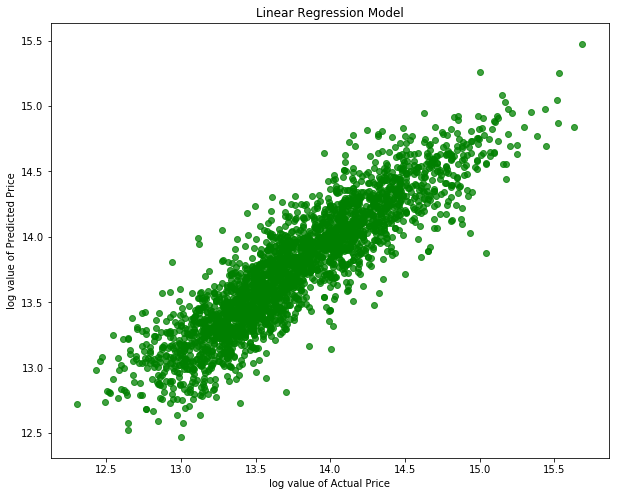

In [130]:
# view this relationship between predictions and actual_values graphically with a scatter plot.

lr_PriceArr = np.array(lr_test_results.predictions.select('logPrice').collect())
lr_PredictionArr = np.array(lr_test_results.predictions.select('Prediction').collect())

plt.figure(figsize=(10,8))
plt.scatter(lr_PriceArr,lr_PredictionArr, alpha=.75,
            color='g')  # alpha helps to show overlapping data
plt.xlabel('log value of Actual Price')
plt.ylabel('log value of Predicted Price')
plt.title('Linear Regression Model')

plt.show()


In [28]:
# Random forest Regression start from here
#importing Random Forest Regression
from pyspark.ml import Pipeline
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator



In [40]:

# train RandomForest model
rf = RandomForestRegressor(labelCol="logPrice", featuresCol="features", predictionCol = "prediction")

rf_pipeline = Pipeline(stages=[assembler, rf])


In [41]:
#randomly split data into training and test dataset
#(rf_train_data, rf_test_data) = final_housing_data.randomSplit([0.7, 0.3], seed = 111)


rf_model = rf_pipeline.fit(train_data)

# Make predictions on test data
rf_test_results = rf_model.transform(test_data)

rf_test_results.columns


['Rooms',
 'Suburb',
 'Type',
 'Price',
 'Method',
 'Distance',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'CouncilArea',
 'Lattitude',
 'Longtitude',
 'Regionname',
 'Propertycount',
 'TypeIndex',
 'TypeVec',
 'RegionnameIndex',
 'RegionnameVec',
 'MethodIndex',
 'MethodVec',
 'CouncilAreaIndex',
 'CouncilAreaVec',
 'logPrice',
 'features',
 'prediction']

In [42]:
# If we select the actual and predicted results, we can see that some predictions were correct while others were wrong.
rf_test_results.select('logPrice','prediction', 'features').show(10)

# Select (prediction, true label) and compute test error
rf_evaluator = RegressionEvaluator(labelCol="logPrice", predictionCol="prediction",metricName="rmse")
rmse = rf_evaluator.evaluate(rf_test_results)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

+------------------+------------------+--------------------+
|          logPrice|        prediction|            features|
+------------------+------------------+--------------------+
|  13.9108207377686|12.972170336674804|(56,[0,2,5,7,8,9,...|
|14.176675407175859|14.055459866634198|(56,[0,1,4,7,8,9,...|
|12.542544882151386|12.847137579490687|(56,[0,2,5,7,8,9,...|
|12.911642346088676|12.910783599155883|(56,[0,2,3,7,8,9,...|
|13.248114582709889|12.938656524063338|(56,[0,2,3,7,8,9,...|
|12.873902018105829|12.778064733927819|(56,[0,2,3,7,8,9,...|
|12.577636201962656| 12.84659903648039|(56,[0,2,5,7,8,9,...|
|12.736700896592344|12.964098022923078|(56,[0,2,6,7,8,9,...|
|12.515393893085436| 12.82638030188582|(56,[0,2,5,7,8,9,...|
|12.821258284620408| 12.83681454829462|(56,[0,2,3,7,8,9,...|
+------------------+------------------+--------------------+
only showing top 10 rows

Root Mean Squared Error (RMSE) on test data = 0.248979


In [43]:
from sklearn.metrics import r2_score

ImportError: No module named 'sklearn'

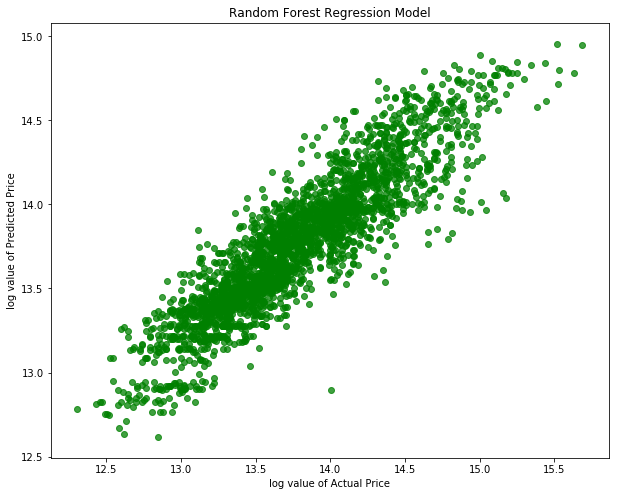

In [120]:
# view this relationship between predictions and actual_values graphically with a scatter plot.

rf_PriceArr = np.array(rf_test_results.select('logPrice').collect())
rf_PredictionArr = np.array(rf_test_results.select('Prediction').collect())

plt.figure(figsize=(10,8))
plt.scatter(rf_PriceArr,rf_PredictionArr, alpha=.75,
            color='g')  # alpha helps to show overlapping data
plt.xlabel('log value of Actual Price')
plt.ylabel('log value of Predicted Price')
plt.title('Random Forest Regression Model')

plt.show()

In [121]:
from pyspark.ml import Pipeline
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator

In [125]:

# train RandomForest model
gbr = GBTRegressor(labelCol="logPrice", featuresCol="features", predictionCol = "prediction")

gbr_pipeline = Pipeline(stages=[assembler, gbr])

In [126]:
#randomly split data into training and test dataset
#(gbr_train_data, gbr_test_data) = final_housing_data.randomSplit([0.7, 0.3], seed = 111)


gbr_model = gbr_pipeline.fit(train_data)

# Make predictions on test data
gbr_test_results = gbr_model.transform(test_data)

gbr_test_results.columns

['Rooms',
 'Type',
 'Price',
 'Method',
 'Distance',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'CouncilArea',
 'Lattitude',
 'Longtitude',
 'Regionname',
 'Propertycount',
 'TypeIndex',
 'TypeVec',
 'RegionnameIndex',
 'RegionnameVec',
 'MethodIndex',
 'MethodVec',
 'CouncilAreaIndex',
 'CouncilAreaVec',
 'logPrice',
 'features',
 'prediction']

In [131]:
# If we select the actual and predicted results, we can see that some predictions were correct while others were wrong.
gbr_test_results.select('logPrice','prediction', 'features').show(10)

# Select (prediction, true label) and compute test error
gbr_evaluator = RegressionEvaluator(labelCol="logPrice", predictionCol="prediction",metricName="rmse")
rmse = gbr_evaluator.evaluate(gbr_test_results)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)


+------------------+------------------+--------------------+
|          logPrice|        prediction|            features|
+------------------+------------------+--------------------+
|12.886641043883259| 12.73778303100884|(56,[0,1,4,7,8,9,...|
|13.374988058040707|13.588108902211806|(56,[0,1,4,7,8,9,...|
|13.556739829006913|13.728108694373907|(56,[0,1,4,7,8,9,...|
|13.658856747918897|14.134872769415422|(56,[0,1,3,7,8,9,...|
|13.722298176242095|13.867463788356297|(56,[0,1,3,7,8,9,...|
|13.732128949025222|13.830653905533822|(56,[0,1,3,7,8,9,...|
|14.176675407175859|14.071166206406257|(56,[0,1,4,7,8,9,...|
|12.959844447906553|12.870494904390002|(56,[0,7,8,9,10,1...|
|13.180632285528304|13.187510611878421|(56,[0,4,7,8,9,10...|
| 13.43131758513165|12.921266040358194|(56,[0,4,7,8,9,10...|
+------------------+------------------+--------------------+
only showing top 10 rows

Root Mean Squared Error (RMSE) on test data = 0.226878


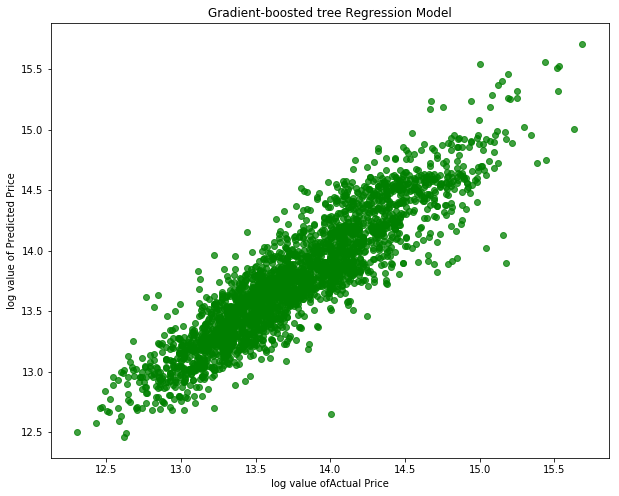

In [129]:
# view this relationship between predictions and actual_values graphically with a scatter plot.

gbr_PriceArr = np.array(gbr_test_results.select('logPrice').collect())
gbr_PredictionArr = np.array(gbr_test_results.select('Prediction').collect())

plt.figure(figsize=(10,8))
plt.scatter(gbr_PriceArr,gbr_PredictionArr, alpha=.75,
            color='g')  # alpha helps to show overlapping data
plt.xlabel('log value ofActual Price')
plt.ylabel('log value of Predicted Price')
plt.title('Gradient-boosted tree Regression Model')

plt.show()